In [30]:
# Importamos las librearias necesarias para visualizar los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Cargamos los datasets
df_clients = pd.read_csv('Cleaning/df_final_clients.csv')
df_webdata = pd.read_csv('Cleaning/df_webdata.csv')

In [32]:
# Visulizamos las 5 primeras filas de los datasets
df_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [33]:
df_webdata.head()

,client_id,visit_id,duration,start,step_1,step_2,step_3,confirm,variation
0,169,749567106_99161211863_557568,00:03:33,1,1,1,1,1,Not participant
1,336,649044751_80905125055_554468,00:15:48,2,0,0,0,0,Not participant
2,546,731811517_9330176838_94847,00:02:13,1,1,1,1,1,Not participant
3,555,637149525_38041617439_716659,00:02:38,1,1,1,1,1,Test
4,647,40369564_40101682850_311847,00:06:17,1,1,1,1,1,Test


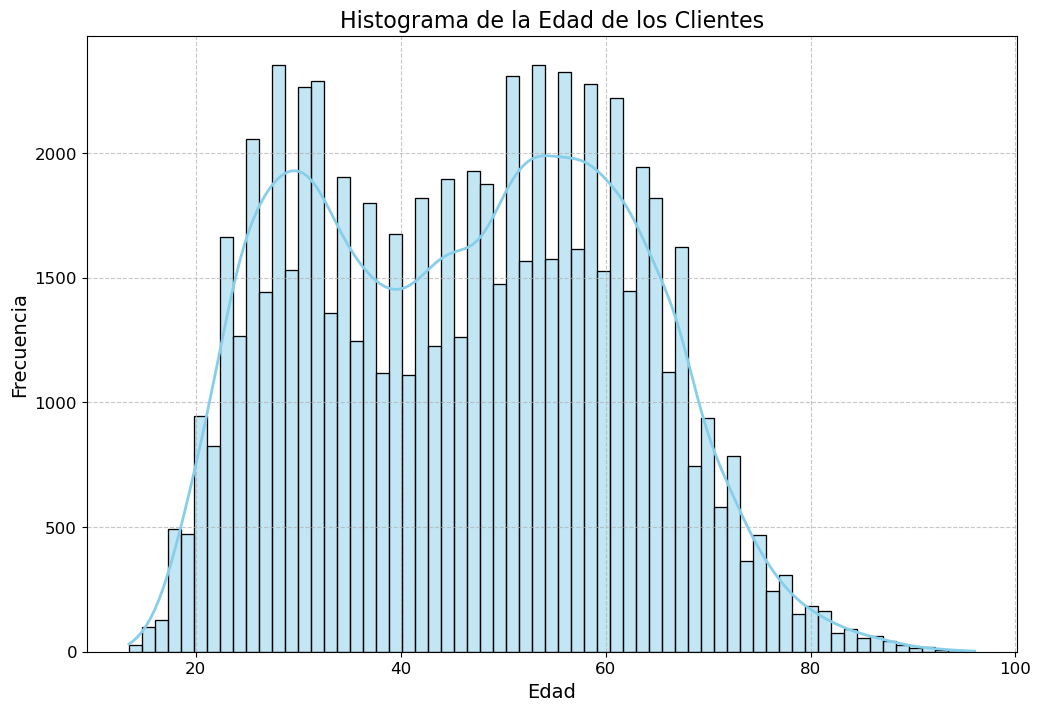

In [34]:
# 1. Histograma de la edad de los clientes
plt.figure(figsize=(12, 8))
sns.histplot(df_clients['clnt_age'], kde=True, color='skyblue', line_kws={'linewidth': 2})
plt.title('Histograma de la Edad de los Clientes', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

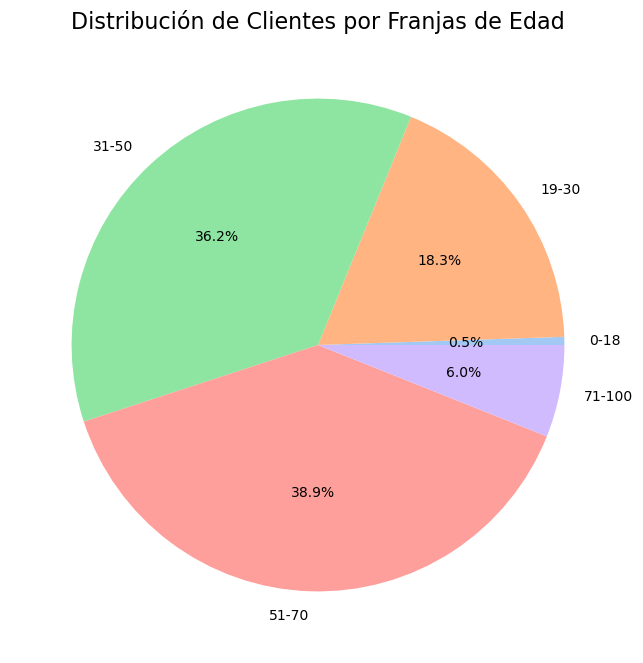

In [35]:
# Gráfico circular de franjas de edad
age_bins = [0, 18, 30, 50, 70, 100]
age_labels = ['0-18', '19-30', '31-50', '51-70', '71-100']
df_clients['age_group'] = pd.cut(df_clients['clnt_age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df_clients['age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
age_group_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución de Clientes por Franjas de Edad', fontsize=16)
plt.ylabel('')
plt.show()

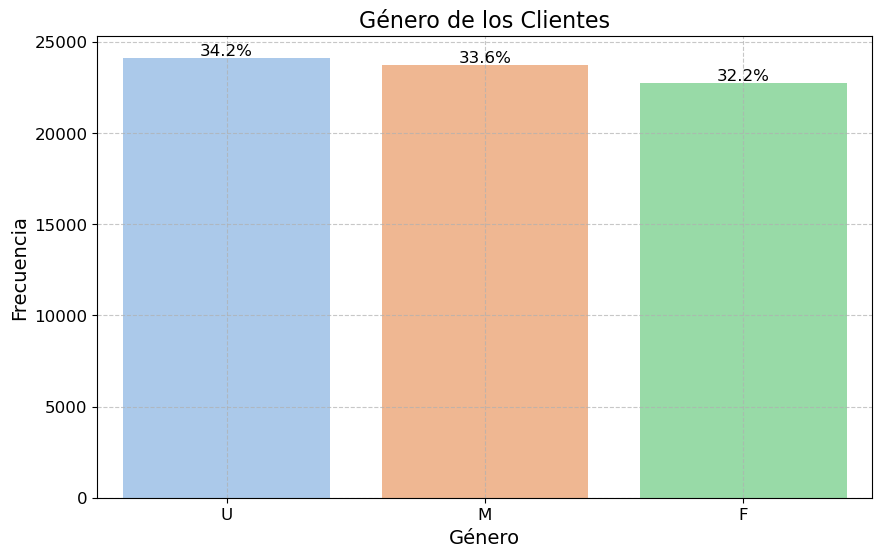

In [ ]:
# 2. Gráfico del género de los clientes
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df_clients, palette='pastel')
plt.title('Género de los Clientes', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de porcentaje encima de las barras
total = len(df_clients)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

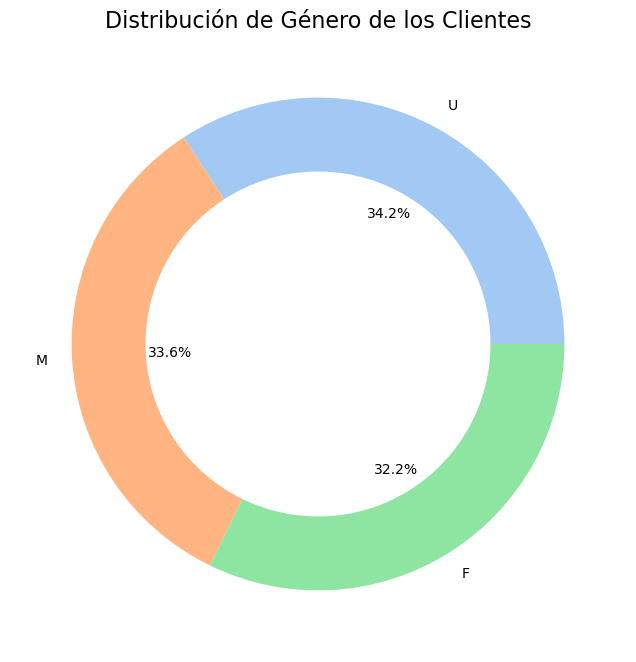

In [ ]:
# Gráfico circular del género
gender_counts = df_clients['gender'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Distribución de Género de los Clientes', fontsize=16)
plt.show()

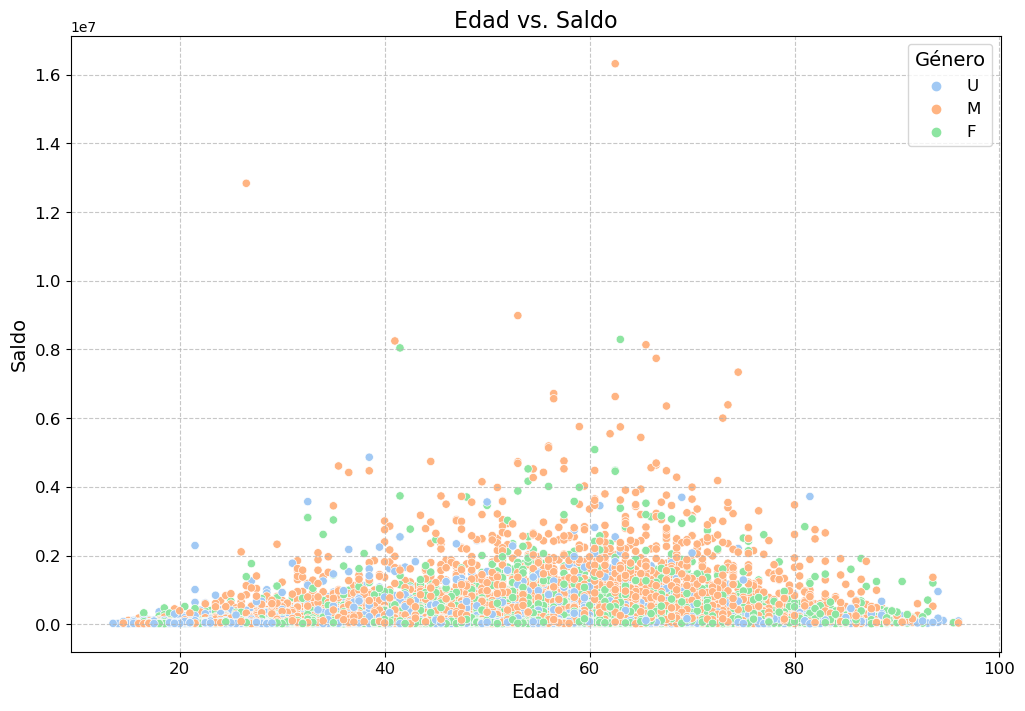

In [37]:
# 3. Gráfico de dispersión de la edad vs. saldo
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clients, x='clnt_age', y='bal', hue='gender', palette='pastel')
plt.title('Edad vs. Saldo', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Saldo', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Género', fontsize=12, title_fontsize=14)
plt.show()

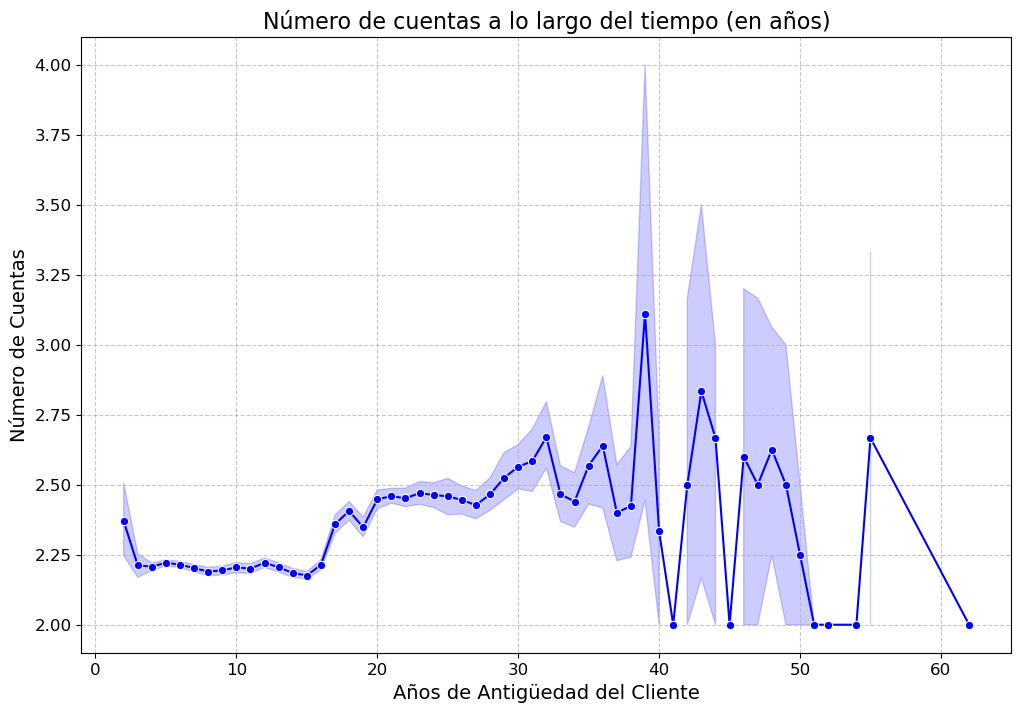

In [43]:
# 5. Gráfico de líneas del número de cuentas a lo largo del tiempo en años
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_clients, x='clnt_tenure_yr', y='num_accts', marker='o', color='b')
plt.title('Número de cuentas a lo largo del tiempo (en años)', fontsize=16)
plt.xlabel('Años de Antigüedad del Cliente', fontsize=14)
plt.ylabel('Número de Cuentas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

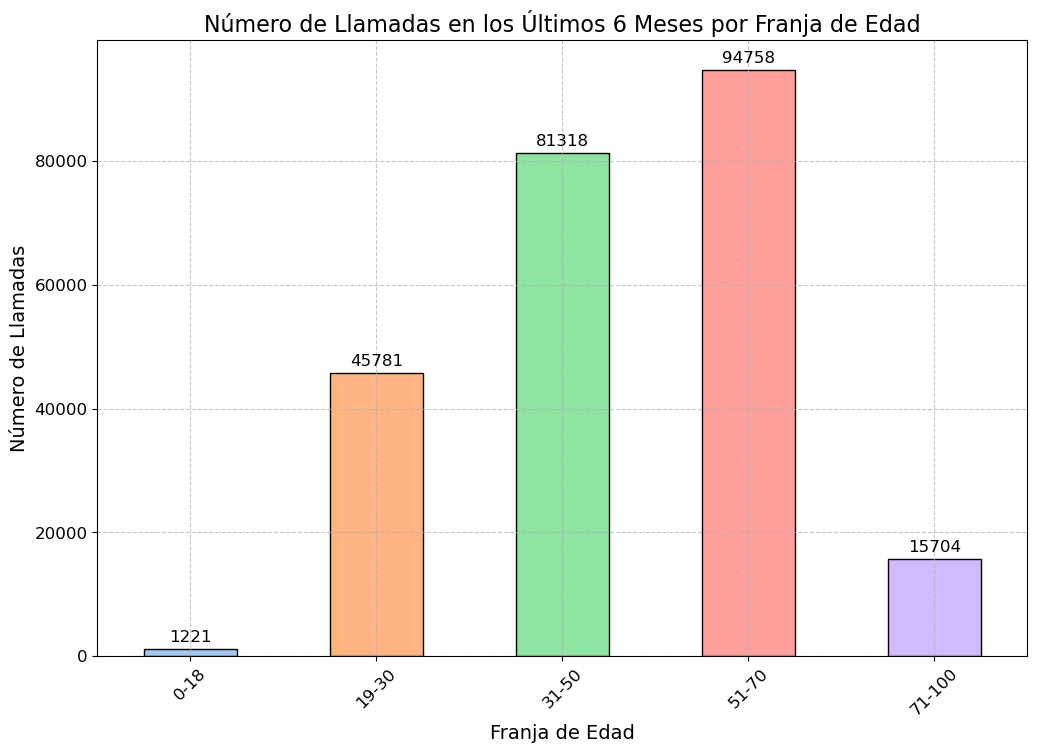

In [75]:
# Número de llamadas por franja de edad
calls_by_age_group = df_clients.groupby('age_group')['calls_6_mnth'].sum()

plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', len(calls_by_age_group))
bars = calls_by_age_group.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Número de Llamadas en los Últimos 6 Meses por Franja de Edad', fontsize=16)
plt.xlabel('Franja de Edad', fontsize=14)
plt.ylabel('Número de Llamadas', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de valores encima de las barras
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=12, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

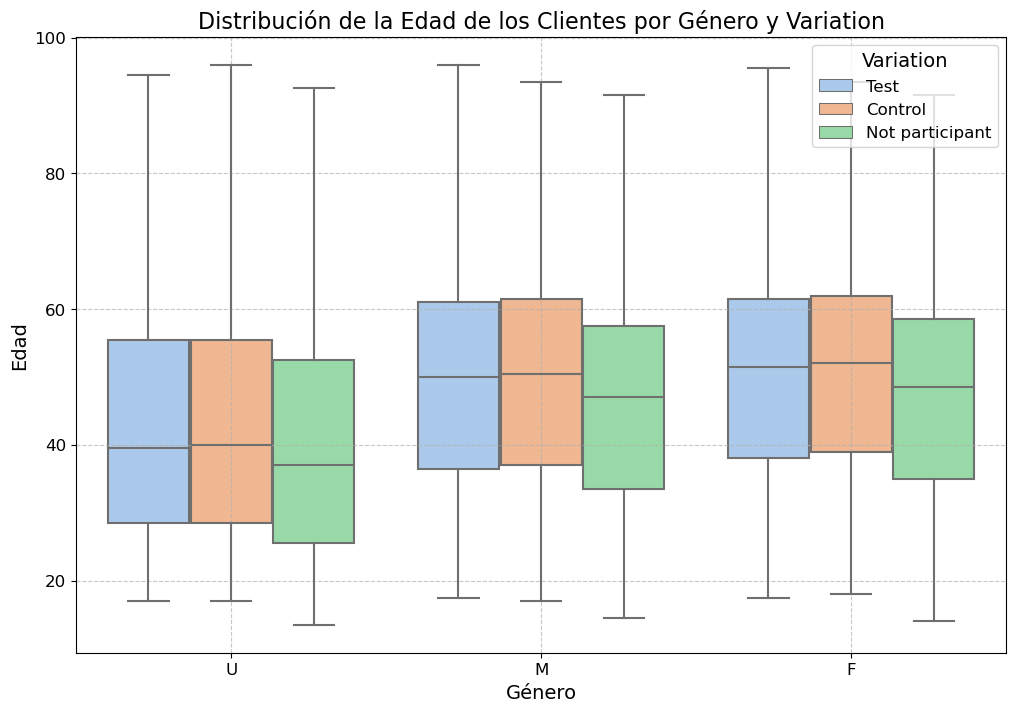

In [55]:
# 1. Boxplot del género de los clientes por variation
plt.figure(figsize=(12, 8))
sns.boxplot(x='gender', y='clnt_age', hue='variation', data=df_clients, palette='pastel')
plt.title('Distribución de la Edad de los Clientes por Género y Variation', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Edad', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Variation', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

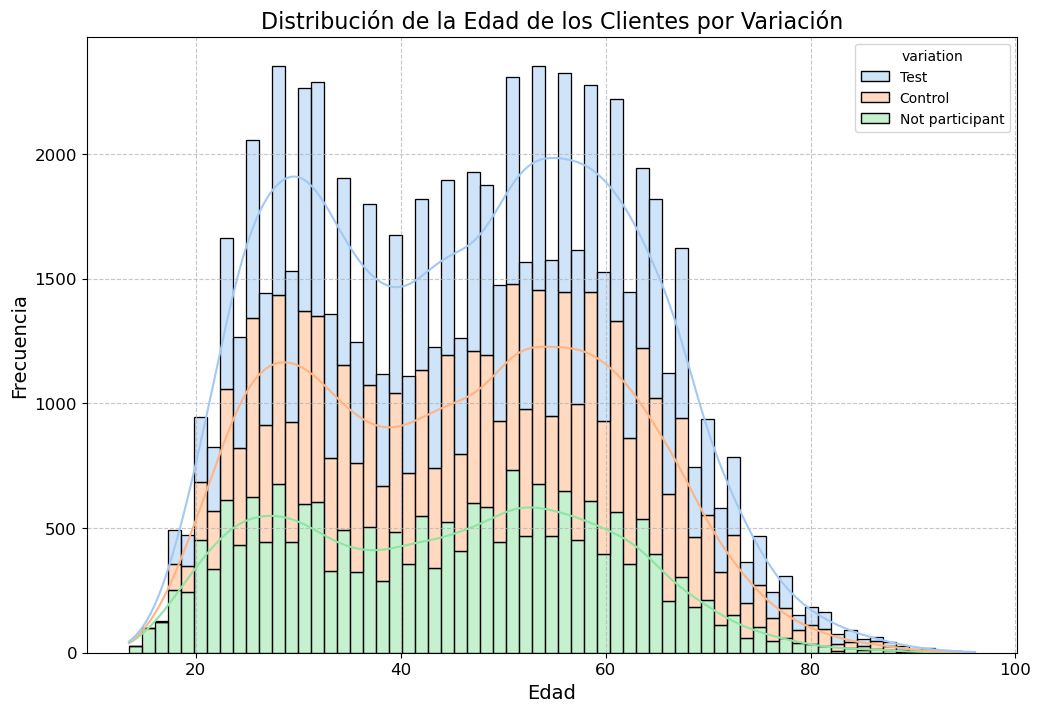

In [53]:
# Gráfico de barras de la edad de los clientes por variación
plt.figure(figsize=(12, 8))
sns.histplot(data=df_clients, x='clnt_age', hue='variation', multiple='stack', palette='pastel', kde=True)
plt.title('Distribución de la Edad de los Clientes por Variación', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [56]:
# Convertir la columna 'duration' a segundos
df_webdata['duration_sec'] = pd.to_timedelta(df_webdata['duration']).dt.total_seconds()

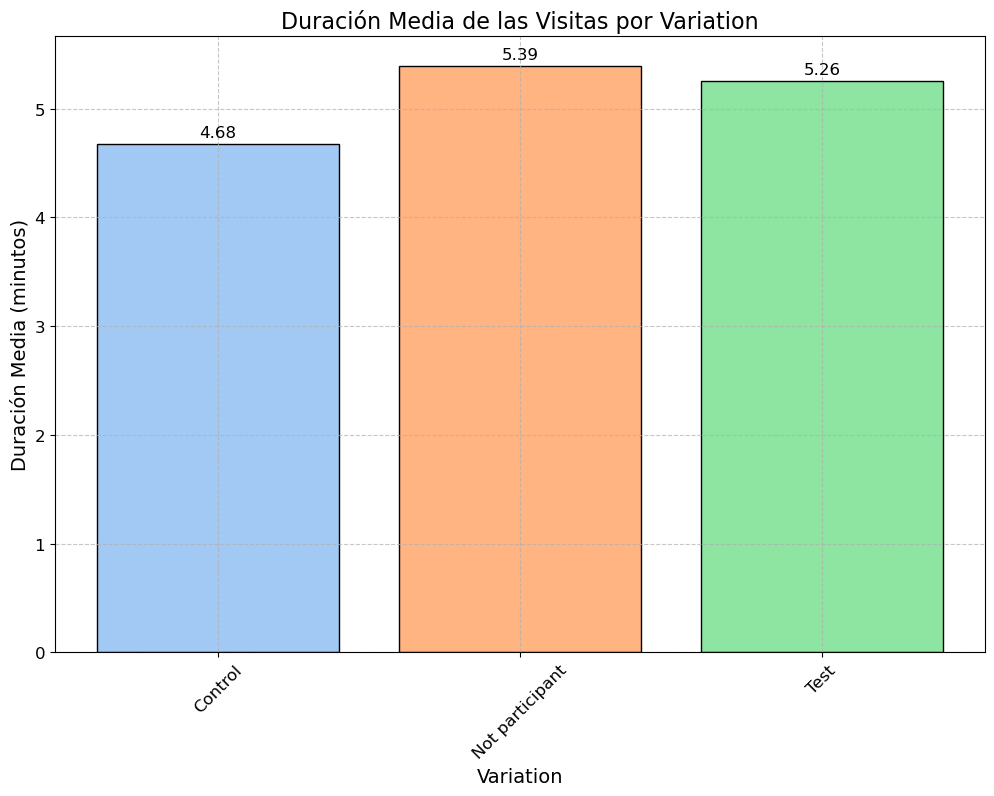

In [74]:
# Gráfico de barras de la duración media de las visitas por variation
mean_duration = df_webdata.groupby('variation')['duration_min'].mean()

plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', len(mean_duration))
bars = plt.bar(mean_duration.index, mean_duration, color=colors, edgecolor='black')
plt.title('Duración Media de las Visitas por Variation', fontsize=16)
plt.xlabel('Variation', fontsize=14)
plt.ylabel('Duración Media (minutos)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de valores encima de las barras
for bar in bars:
    plt.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', size=12, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

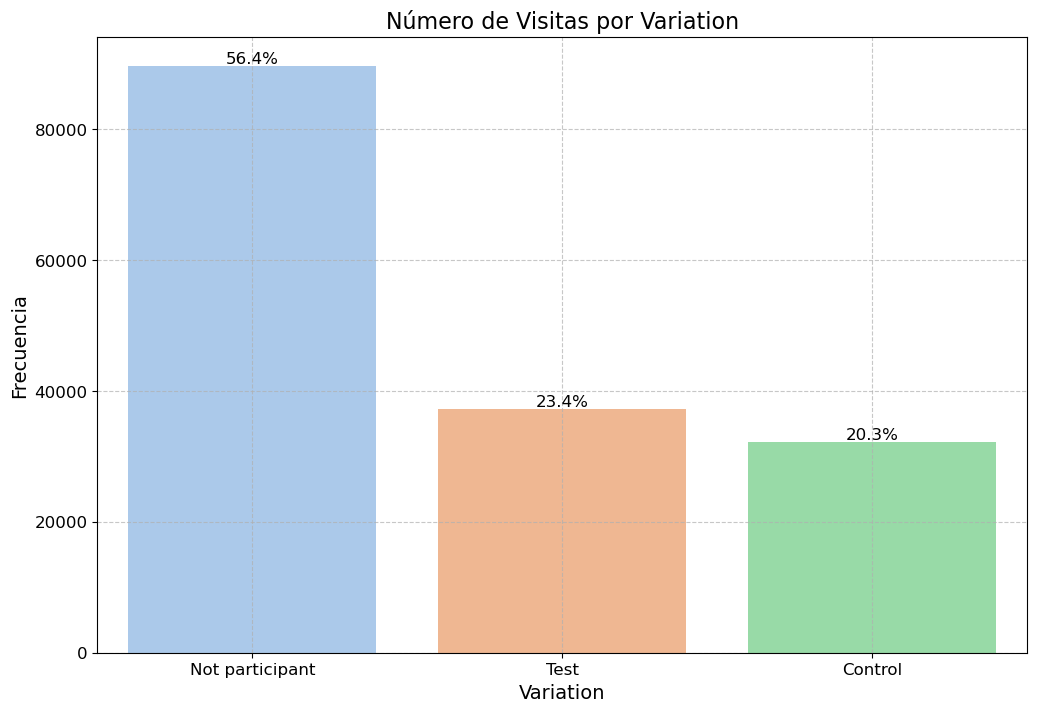

In [62]:
# 2. Gráfico de barras del número de visitas por variation
plt.figure(figsize=(12, 8))
sns.countplot(x='variation', data=df_webdata, palette='pastel')
plt.title('Número de Visitas por Variation', fontsize=16)
plt.xlabel('Variation', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de porcentaje encima de las barras
total_visits = len(df_webdata)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total_visits:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

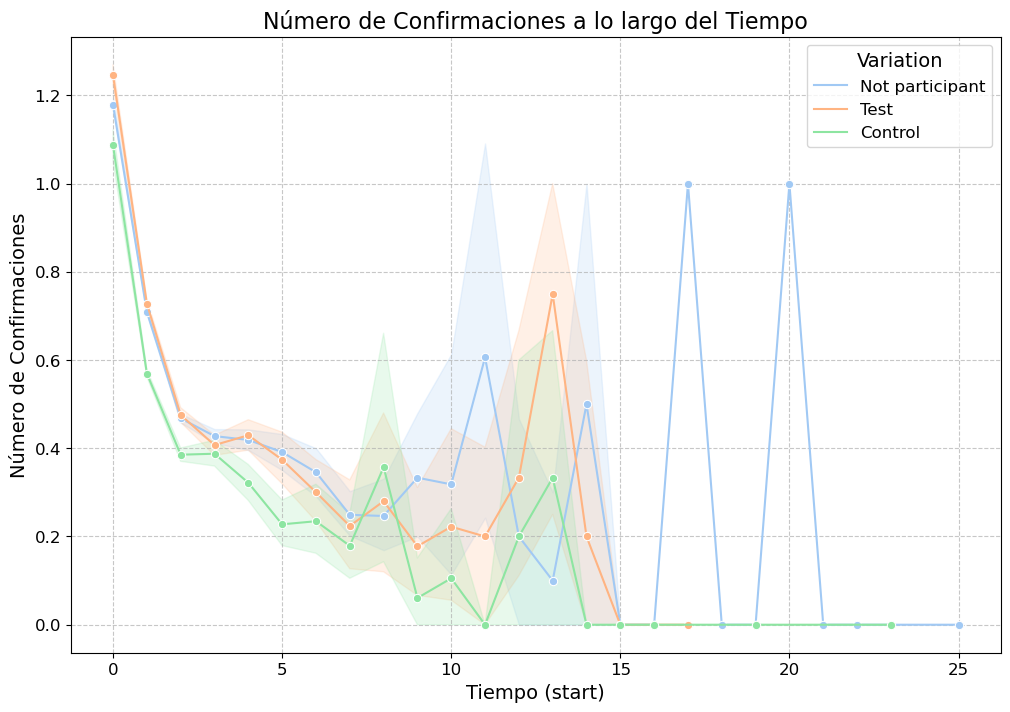

In [65]:
# Gráfico de líneas del número de confirmaciones a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_webdata, x='start', y='confirm', hue='variation', marker='o', palette='pastel')
plt.title('Número de Confirmaciones a lo largo del Tiempo', fontsize=16)
plt.xlabel('Tiempo (start)', fontsize=14)
plt.ylabel('Número de Confirmaciones', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Variation', fontsize=12, title_fontsize=14)
plt.show()

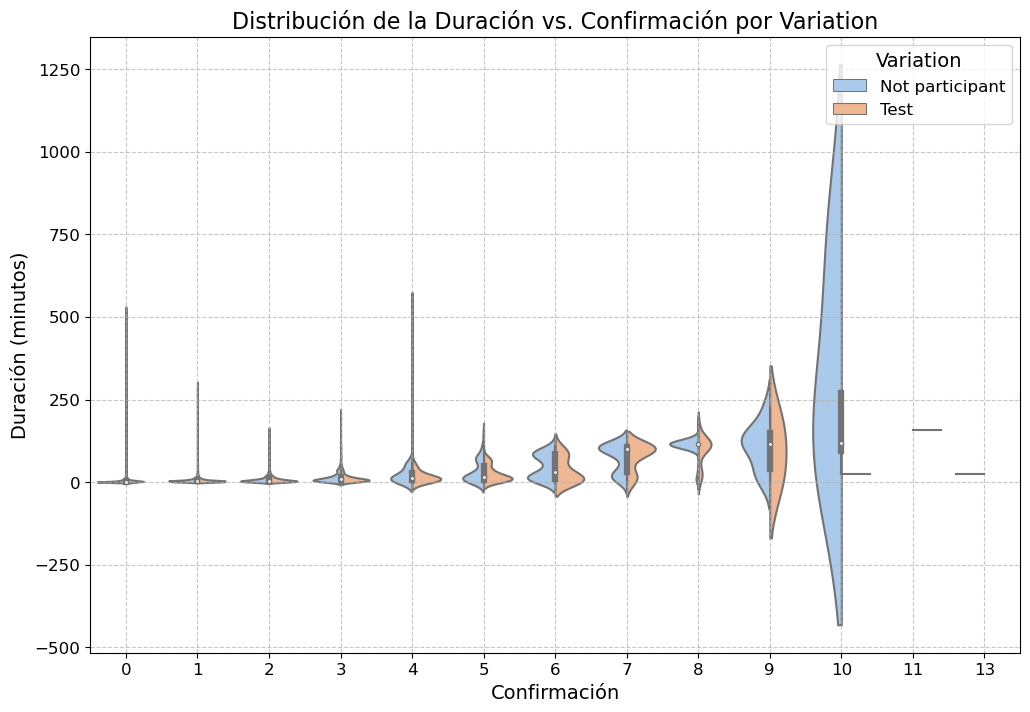

In [71]:
# Filtrar el dataframe para incluir solo dos niveles de 'variation'
filtered_df = df_webdata[df_webdata['variation'].isin(df_webdata['variation'].unique()[:2])]

# Gráfico de violín de la duración vs. confirmación por variation en minutos
plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_df, x='confirm', y='duration_min', hue='variation', palette='pastel', split=True)
plt.title('Distribución de la Duración vs. Confirmación por Variation', fontsize=16)
plt.xlabel('Confirmación', fontsize=14)
plt.ylabel('Duración (minutos)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Variation', fontsize=12, title_fontsize=14)
plt.show()
